# &#x1F3E2; &nbsp; My Exercises

#### &#x1F4D1; &nbsp; 0. Links & Libraries

In [1]:
from mpl_toolkits.basemap import Basemap
import scipy.ndimage.filters
from ipywidgets import *

In [2]:
from IPython.core.display import display_html, display_javascript, Javascript, Math, HTML
import numpy as np
import pandas as pd

In [3]:
import d3_lib, random, vincent, math, tables, mpld3
from mpld3 import plugins
vincent.core.initialize_notebook()

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### &#x1F4D1; &nbsp; 1. Maps

In [12]:
data = pd.read_csv('worldcitiespop.txt')

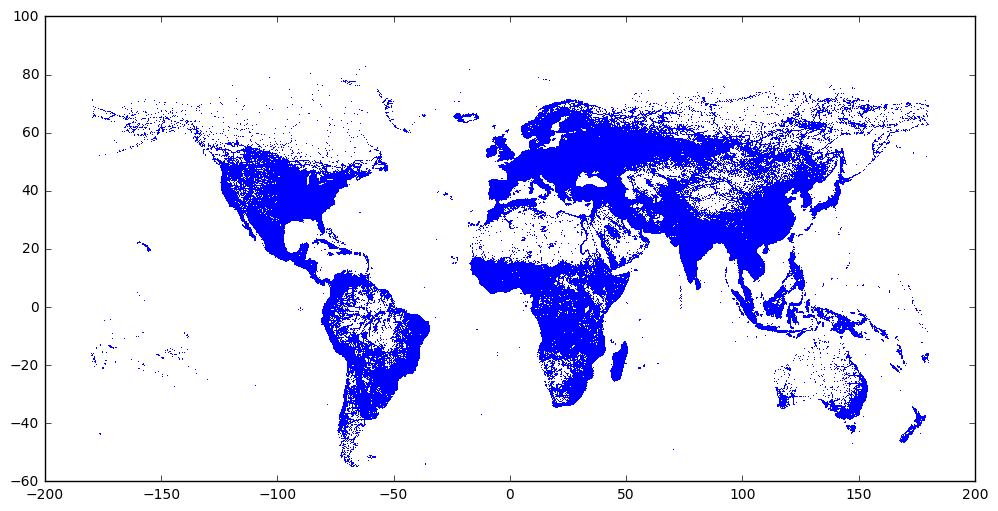

In [27]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.plot(data.Longitude, data.Latitude, ',')

In [18]:
locations = data[['Longitude','Latitude']].as_matrix()

In [33]:
m = Basemap(projection='mill', llcrnrlat=-65, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180)
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)
x, y = m(locations[:,0], locations[:,1])

In [37]:
population = data.Population
weights = population.copy()
weights[np.isnan(weights)] = 1000

In [40]:
h, _, _ = np.histogram2d(x, y, bins=(np.linspace(x0, x1, 500), np.linspace(y0, y1, 500)), weights=weights)
h[h==0] = 1

In [42]:
z = scipy.ndimage.filters.gaussian_filter(np.log(h.T), 1)

In [ ]:
cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'inferno', 'plasma', 'magma']),
                            
         ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]

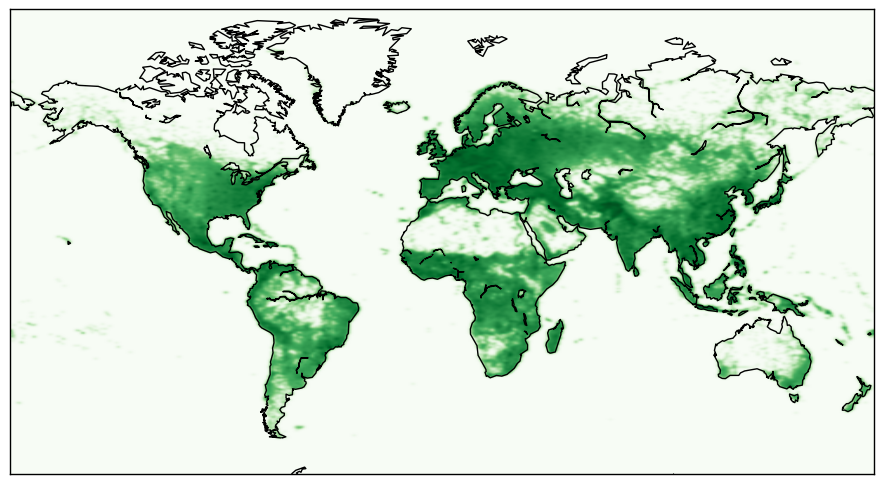

In [68]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
m.drawcoastlines()
m.imshow(z, origin='lower', extent=[x0,x1,y0,y1], cmap=plt.get_cmap('Greens'))

#### &#x1F4D1; &nbsp; 2. Plots

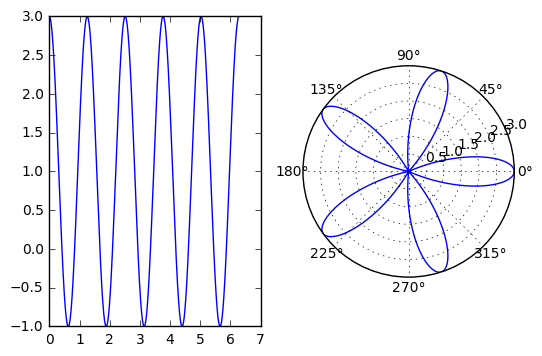

In [70]:
x = linspace(0, 2 * pi, 1000)
y = 1 + 2 * cos(5 * x)
subplot(121)
plot(x, y)
subplot(122, polar=True)
polar(x, y)

In [7]:
import random
list_data = random.sample(range(1000), 50)
bar = vincent.Bar(list_data)
bar.display() 

#### &#x1F4D1; &nbsp; 3. Interactive cells

In [9]:
ask = int(input("Enter the integer number "))

Enter the integer number 457


In [10]:
ask

457

##### ipywidgets

In [15]:
b = np.array([1,2,3,4,5,6,3,5,11,3,9,7,20,4,6,2,7,15,2,3,6])
widgets.Dropdown(options=list(set(b)), value=5, description='b-values')

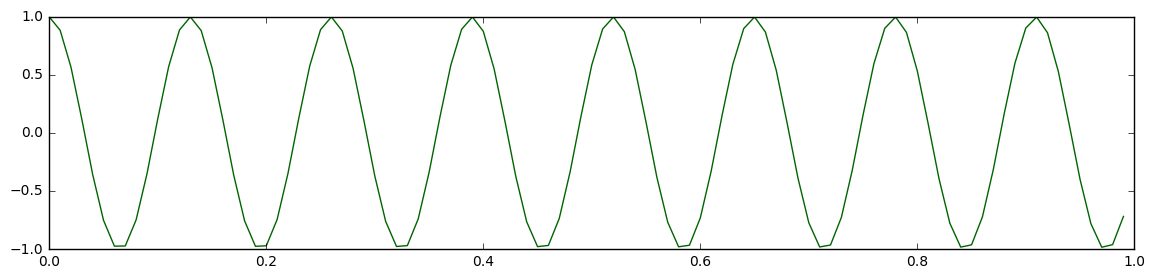

In [19]:
plt.style.use('seaborn-muted')
t = arange(0.0, 1.0, 0.01)
def plot_cos(f):
    plt.figure(figsize=(14, 3))
    plt.plot(t,cos(2*pi*t*f),'darkgreen')
    plt.show()
interact(plot_cos, f=(1, 10, 0.1))

##### mpld3

In [28]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20), origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)
ax.set_title('Interactive Mouse', size=30)

plugins.connect(fig, plugins.MousePosition(fontsize=30))

mpld3.display(fig)

#### &#x1F4D1; &nbsp; 4. Tables

#### &#x1F4D1; &nbsp; 5. Strings

In [110]:
print(list('palindrome'))
print([*'palindrome'])
print('palindrome'.startswith('pali'), 'palindrome'.startswith('she'))
print('number'.endswith('er'), 'number'.endswith('or'))
print('ind' in 'palindrome', 'ed' in 'palindrome')
print('the next weekend'.count('e'), ";", 'the next weekend'.count('s'))

['p', 'a', 'l', 'i', 'n', 'd', 'r', 'o', 'm', 'e']
['p', 'a', 'l', 'i', 'n', 'd', 'r', 'o', 'm', 'e']
True False
True False
True False
5 ; 0


In [111]:
print('the next weekend'.upper(), ";", 'THE NEXT WEEKEND'.lower())
print('the next weekend'.replace('e', 'lll'), ";", 'THE NEXT WEEKEND'.replace(' ', ''))
print('the next weekend'.index('e') + 1, ";", 'THE NEXT WEEKEND'.rindex('E') + 1)
print('thenextweekend'.isalpha(), ";", 'THENEXTWEEKEND'.isalnum(), ";", 'THENEXTWEEKEND'.isdigit())

THE NEXT WEEKEND ; the next weekend
thlll nlllxt wllllllklllnd ; THENEXTWEEKEND
3 ; 14
True ; True ; False


In [112]:
print('the next weekend'.split(),";",' '.join(['the', 'next', 'weekend']),";",'&'.join(['the', 'next', 'weekend']))

['the', 'next', 'weekend'] ; the next weekend ; the&next&weekend


In [113]:
import re
print(re.findall(r'we\w+','the next weekend we are walking'), ";", 
      re.findall(r'e+','the next weekend we are walking'))

['weekend'] ; ['e', 'e', 'ee', 'e', 'e', 'e']


#### &#x1F4D1; &nbsp; 6. Functional Programming 

In [114]:
L = [('Italy', 'Rome'), ('France', 'Paris'), ('US', 'Washington DC')]
dict(iter(L))  

{'France': 'Paris', 'Italy': 'Rome', 'US': 'Washington DC'}

#### &#x1F4D1; &nbsp; 7. Data Structure 

In [29]:
G = {'A': [('B', 2), ('D', 6), ('G', 4), ('J', 3)],
     'B': [('A', 2), ('C', 5)], 
     'C': [('B', 5), ('E', 5)],
     'D': [('A', 6), ('E', 8)],
     'E': [('C', 5), ('D', 8), ('F', 3)],
     'F': [('E', 3), ('G', 7)],
     'G': [('A', 4), ('F', 7), ('H', 8), ('I', 3)],
     'H': [('G', 8)], 
     'I': [('G', 3), ('J', 7)],
     'J': [('A', 3), ('I', 7)]}

In [30]:
def dict_format(G):
    nodes = sorted(list(G.keys()))
    G_node = dict(enumerate(nodes))
    G_dict_format = {}
    for node in nodes:
        number = list(G_node.keys())[list(G_node.values()).index(node)]
        G_dict_format[number] = []
        for pair in G[node]: 
            (x,y)= pair
            n = list(G_node.keys())[list(G_node.values()).index(x)]
            G_dict_format[number].append(dict([(n,y)]))
    return G_dict_format

In [31]:
print(dict_format(G))

{0: [{1: 2}, {3: 6}, {6: 4}, {9: 3}], 1: [{0: 2}, {2: 5}], 2: [{1: 5}, {4: 5}], 3: [{0: 6}, {4: 8}], 4: [{2: 5}, {3: 8}, {5: 3}], 5: [{4: 3}, {6: 7}], 6: [{0: 4}, {5: 7}, {7: 8}, {8: 3}], 7: [{6: 8}], 8: [{6: 3}, {9: 7}], 9: [{0: 3}, {8: 7}]}


In [32]:
from collections import OrderedDict
OrderedDict(sorted(G.items(), key=lambda t: t[0]))

OrderedDict([('A', [('B', 2), ('D', 6), ('G', 4), ('J', 3)]),
             ('B', [('A', 2), ('C', 5)]),
             ('C', [('B', 5), ('E', 5)]),
             ('D', [('A', 6), ('E', 8)]),
             ('E', [('C', 5), ('D', 8), ('F', 3)]),
             ('F', [('E', 3), ('G', 7)]),
             ('G', [('A', 4), ('F', 7), ('H', 8), ('I', 3)]),
             ('H', [('G', 8)]),
             ('I', [('G', 3), ('J', 7)]),
             ('J', [('A', 3), ('I', 7)])])

In [33]:
OrderedDict(sorted(G.items(), key=lambda t: t[1]))

OrderedDict([('B', [('A', 2), ('C', 5)]),
             ('J', [('A', 3), ('I', 7)]),
             ('G', [('A', 4), ('F', 7), ('H', 8), ('I', 3)]),
             ('D', [('A', 6), ('E', 8)]),
             ('A', [('B', 2), ('D', 6), ('G', 4), ('J', 3)]),
             ('C', [('B', 5), ('E', 5)]),
             ('E', [('C', 5), ('D', 8), ('F', 3)]),
             ('F', [('E', 3), ('G', 7)]),
             ('I', [('G', 3), ('J', 7)]),
             ('H', [('G', 8)])])

In [34]:
print(G.items())

dict_items([('G', [('A', 4), ('F', 7), ('H', 8), ('I', 3)]), ('I', [('G', 3), ('J', 7)]), ('E', [('C', 5), ('D', 8), ('F', 3)]), ('C', [('B', 5), ('E', 5)]), ('B', [('A', 2), ('C', 5)]), ('A', [('B', 2), ('D', 6), ('G', 4), ('J', 3)]), ('H', [('G', 8)]), ('F', [('E', 3), ('G', 7)]), ('J', [('A', 3), ('I', 7)]), ('D', [('A', 6), ('E', 8)])])


In [44]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
X = csr_matrix([[0, 8, 0, 3],
                [0, 0, 2, 5],
                [0, 0, 0, 6],
                [0, 0, 0, 0]])
Tcsr = minimum_spanning_tree(X)
Tcsr.toarray().astype(int)

array([[0, 0, 0, 3],
       [0, 0, 2, 5],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### &#x1F4D1; &nbsp; 8. Graphs

In [36]:
edges = []
for node1, ws in G.items():
    for (node2, w) in ws:
        edges.append((node1, node2, w))
print (edges)

[('G', 'A', 4), ('G', 'F', 7), ('G', 'H', 8), ('G', 'I', 3), ('I', 'G', 3), ('I', 'J', 7), ('E', 'C', 5), ('E', 'D', 8), ('E', 'F', 3), ('C', 'B', 5), ('C', 'E', 5), ('B', 'A', 2), ('B', 'C', 5), ('A', 'B', 2), ('A', 'D', 6), ('A', 'G', 4), ('A', 'J', 3), ('H', 'G', 8), ('F', 'E', 3), ('F', 'G', 7), ('J', 'A', 3), ('J', 'I', 7), ('D', 'A', 6), ('D', 'E', 8)]


{('A', 'D'): 6, ('A', 'B'): 2, ('E', 'F'): 3, ('G', 'A'): 4, ('G', 'I'): 3, ('A', 'J'): 3, ('E', 'C'): 5, ('G', 'H'): 8, ('G', 'F'): 7, ('C', 'B'): 5, ('E', 'D'): 8, ('I', 'J'): 7}


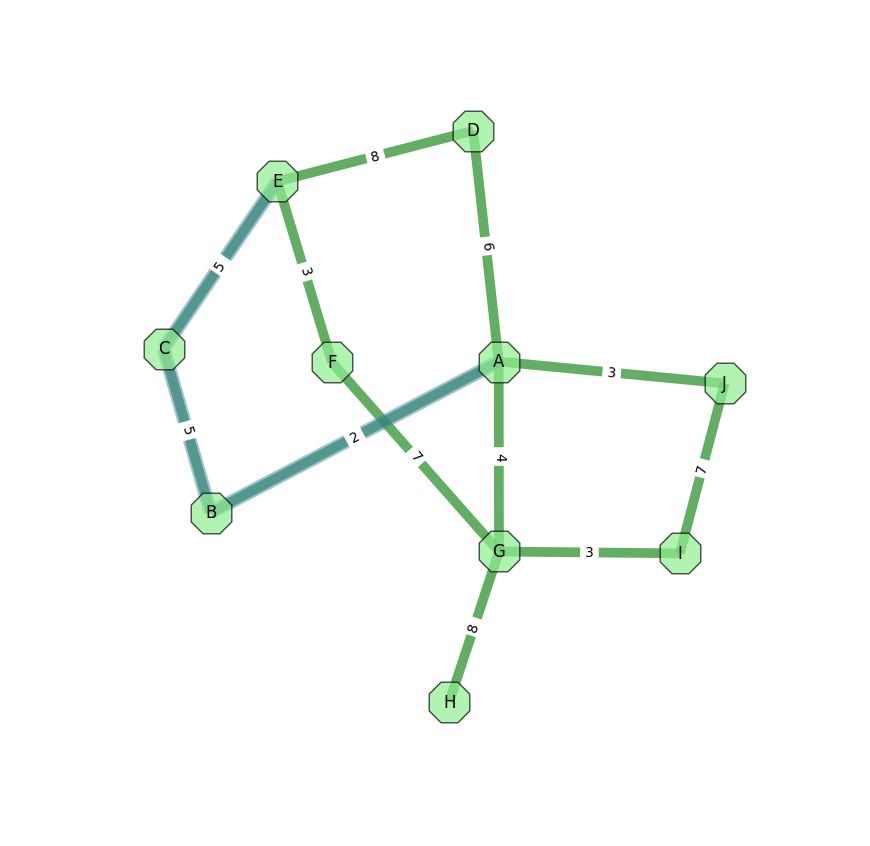

In [37]:
GG = nx.Graph()

for (node1, node2, way) in edges:
    GG.add_edge(node1, node2, length=way)
    
nodes = nx.shortest_path(GG, 'A', 'E', weight='length')
shortest_path = []
for i in range(len(nodes)-1):   
    shortest_path.append((nodes[i], nodes[i+1]))

lengths=nx.get_edge_attributes(GG,'length')   
pos=nx.spring_layout(GG)

nx.draw(GG, pos, with_labels=True, node_shape='8', node_size=1000, 
        node_color='lightgreen', edge_color='forestgreen', width=7, alpha=0.7)
nx.draw_networkx_edge_labels(GG, pos, edge_labels=lengths)
nx.draw_networkx_edges(GG, pos=pos, edgelist=shortest_path,
                       edge_color = 'steelblue', width=10, alpha=0.5)
print (lengths)

In [38]:
print(GG.edges())
print (nx.shortest_path(GG, 'A', 'E', weight='length'),':', nx.shortest_path_length(GG, 'A', 'E', weight='length'))
print (shortest_path)

[('G', 'A'), ('G', 'I'), ('G', 'F'), ('G', 'H'), ('I', 'J'), ('E', 'F'), ('E', 'C'), ('E', 'D'), ('C', 'B'), ('A', 'D'), ('A', 'J'), ('A', 'B')]
['A', 'B', 'C', 'E'] : 12
[('A', 'B'), ('B', 'C'), ('C', 'E')]


In [39]:
from networkx.readwrite import json_graph
import json
GG_json_graph = json.dumps(json_graph.node_link_data(GG))
print (GG_json_graph)

{"nodes": [{"id": "G"}, {"id": "I"}, {"id": "E"}, {"id": "C"}, {"id": "H"}, {"id": "A"}, {"id": "B"}, {"id": "F"}, {"id": "J"}, {"id": "D"}], "directed": false, "multigraph": false, "graph": {}, "links": [{"source": 0, "length": 4, "target": 5}, {"source": 0, "length": 3, "target": 1}, {"source": 0, "length": 7, "target": 7}, {"source": 0, "length": 8, "target": 4}, {"source": 1, "length": 7, "target": 8}, {"source": 2, "length": 3, "target": 7}, {"source": 2, "length": 5, "target": 3}, {"source": 2, "length": 8, "target": 9}, {"source": 3, "length": 5, "target": 6}, {"source": 5, "length": 6, "target": 9}, {"source": 5, "length": 3, "target": 8}, {"source": 5, "length": 2, "target": 6}]}


In [35]:
HTML('<script src="d3.v3.min.js"></script>')
HTML('<script src="dimple.v2.1.6.min.js"></script>')
HTML('<script src="plotly-latest.min.js"></script>')
HTML(d3_lib.set_styles(['basic_axis','basic_line','basic_scatter',
                        'force_directed_graph','day-hr-heatmap','3d_viewer']))

In [40]:
HTML(d3_lib.draw_graph('force_directed_graph',{'data': GG_json_graph}))

In [41]:
n_nodes = 30
p_edge = 0.04
graph = {"nodes": [], "links": []}
for i in range(n_nodes):
    graph["nodes"].append( {"name": "i" + str(i), "group": int(random.uniform(1,11))} )
for i in range(n_nodes):
    for j in range(n_nodes):
        if random.uniform(0,1) < p_edge:
            graph["links"].append( {"source": i, "target": j, "value": random.uniform(0.5,5.5)} )

In [42]:
HTML(d3_lib.draw_graph('force_directed_graph',{'data': graph}))

#### &#x1F4D1; &nbsp; 9. Maths

In [43]:
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$